<a href="https://colab.research.google.com/github/elateifsara/ML-DS-projects/blob/master/Build_a_BERT_Text_classification_using_Amazon_forum_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial

We are going to use [Simple Transformers](https://github.com/ThilinaRajapakse/simpletransformers) - an NLP library based on the [Transformers](https://github.com/huggingface/transformers) library by HuggingFace. Simple Transformers allows us to fine-tune Transformer models in a few lines of code.  

For the dataset, we are going to use the scraped Amazon e-commerce Forum data.

### We are going to

- install Simple Transformers library
- select a pre-trained monolingual model
- load the dataset
- train/fine-tune our model
- evaluate the results of it
- save and load the model
- test the loaded model on a real example

# Install Simple Transformers library 

In [1]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

     |████████████████████████████████| 204kB 19.9MB/s 
     |████████████████████████████████| 3.2MB 47.4MB/s 
     |████████████████████████████████| 1.9MB 56.8MB/s 
     |████████████████████████████████| 1.2MB 54.0MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 1.8MB 27.8MB/s 
     |████████████████████████████████| 51kB 10.2MB/s 
     |████████████████████████████████| 317kB 47.5MB/s 
     |████████████████████████████████| 7.5MB 51.1MB/s 
     |████████████████████████████████| 163kB 64.8MB/s 
     |████████████████████████████████| 102kB 16.0MB/s 
     |████████████████████████████████| 102kB 15.0MB/s 
     |████████████████████████████████| 133kB 54.1MB/s 
     |████████████████████████████████| 890kB 51.1MB/s 
     |████████████████████████████████| 112kB 56.6MB/s 
     |████████████████████████████████| 4.5MB 50.0MB/s 
     |████████████████████████████████| 71kB 12.8MB/s 
     |████████████████████████████████| 122kB 53.6M

simpletransformers==0.51.13


In [2]:
!pip install tokenizers==0.9.4

     |████████████████████████████████| 2.9MB 15.5MB/s 
  Found existing installation: tokenizers 0.10.0
    Uninstalling tokenizers-0.10.0:
      Successfully uninstalled tokenizers-0.10.0


In [1]:
!wget https://github.com/mentorchains/level1_post_recommender_20/raw/md3/resources/amazon_ecom_forum.csv

--2021-01-23 12:52:00--  https://github.com/mentorchains/level1_post_recommender_20/raw/md3/resources/amazon_ecom_forum.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mentorchains/level1_post_recommender_20/md3/resources/amazon_ecom_forum.csv [following]
--2021-01-23 12:52:00--  https://raw.githubusercontent.com/mentorchains/level1_post_recommender_20/md3/resources/amazon_ecom_forum.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32502914 (31M) [text/plain]
Saving to: ‘amazon_ecom_forum.csv’

amazon_ecom_forum.c 100%[===================>]  31.00M  --.-KB/s    in 0.1s    

2021-01-23 12:52:01

# Select a pre-trained monolingual model

As mentioned above the Simple Transformers library is based on the Transformers library from HuggingFace. This enables us to use every pre-trained model provided in the [Transformers library](https://huggingface.co/transformers/pretrained_models.html) and all community-uploaded models. For a list that includes community-uploaded models, refer to [https://huggingface.co/models](https://huggingface.co/models).

We are going to use the `distilbert-base-german-cased` model. [DistilBERT is a small, fast, cheaper version of BERT](https://huggingface.co/transformers/model_doc/distilbert.html). It has 40% less parameters than `bert-base-uncased` and runs 60% faster while preserving over 95% of Bert’s performance.

# Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv('/content/amazon_ecom_forum.csv')

print(df.shape)
df.head()

(7882, 10)


,Unnamed: 0,Link,Title,Category,Post Author,Leading Comment,Publish Time,Reply Authors,Reply Comments,Reply Times
0,0,http://sellercentral.amazon.com/forums/t/2-box...,2 boxes of books,Fulfillment By Amazon,Earth_Light_Books,I need to know how to start,2020-05-26 17:33:26+00:00,<function get_reply_authors at 0x00000119FBB60...,"['\nI need to know how to start\n', ' \nAmazon...","[Timestamp('2020-05-26 17:48:57+0000', tz='UTC..."
1,1,http://sellercentral.amazon.com/forums/t/fba-s...,FBA Shipment Delivered Delayed Check in,Fulfillment By Amazon,HOUSE_OF_LORDS_RODEO,Hi are there any other seller experiencing del...,2020-05-26 15:28:17+00:00,<function get_reply_authors at 0x00000119FBB60...,['\nHi are there any other seller experiencing...,"[Timestamp('2020-05-26 16:03:50+0000', tz='UTC')]"
2,2,http://sellercentral.amazon.com/forums/t/fba-r...,FBA removal/disposal fees,Fulfillment By Amazon,Texastoys,Hi all\nSo back when the new removaldisposal f...,2020-05-26 05:43:46+00:00,<function get_reply_authors at 0x00000119FBB60...,['\nHi all\nSo back when the new removaldispos...,[]
3,3,http://sellercentral.amazon.com/forums/t/am-i-...,Am i able to send in FBA inventory now?,Fulfillment By Amazon,Assuranceproducts,Im using inventorylab to upload my inventory t...,2020-05-25 16:53:40+00:00,<function get_reply_authors at 0x00000119FBB60...,['\nIm using inventorylab to upload my invento...,"[Timestamp('2020-05-25 17:14:44+0000', tz='UTC..."
4,4,http://sellercentral.amazon.com/forums/t/stran...,Stranded Inventory,Fulfillment By Amazon,BillsBuys,I recently listed 100 books for sale on Amazon...,2020-05-24 02:14:21+00:00,<function get_reply_authors at 0x00000119FBB60...,['\nI recently listed 100 books for sale on Am...,"[Timestamp('2020-05-25 01:42:41+0000', tz='UTC..."


In [3]:
df['Category'].unique()

array(['Fulfillment By Amazon', 'Selling on Amazon',
       'Amazon Marketplace Web Service (MWS)',
       'Amazon Sponsored Products', 'Account Health', 'Global Selling',
       'Amazon Pay', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Login With Amazon', 'Amazon Custom'], dtype=object)

In [5]:
df.drop(columns= ['Unnamed: 0', 'Link', 'Publish Time', 'Reply Times', 'Reply Authors'], inplace=True)

In [6]:
df.head()

,Title,Category,Post Author,Leading Comment,Reply Comments
0,2 boxes of books,Fulfillment By Amazon,Earth_Light_Books,I need to know how to start,"['\nI need to know how to start\n', ' \nAmazon..."
1,FBA Shipment Delivered Delayed Check in,Fulfillment By Amazon,HOUSE_OF_LORDS_RODEO,Hi are there any other seller experiencing del...,['\nHi are there any other seller experiencing...
2,FBA removal/disposal fees,Fulfillment By Amazon,Texastoys,Hi all\nSo back when the new removaldisposal f...,['\nHi all\nSo back when the new removaldispos...
3,Am i able to send in FBA inventory now?,Fulfillment By Amazon,Assuranceproducts,Im using inventorylab to upload my inventory t...,['\nIm using inventorylab to upload my invento...
4,Stranded Inventory,Fulfillment By Amazon,BillsBuys,I recently listed 100 books for sale on Amazon...,['\nI recently listed 100 books for sale on Am...


In [19]:
df['post'] = df['Title'] + ' ' + df['Leading Comment'] + ' ' + df['Reply Comments']

In [20]:
import pandas as pd
import numpy as np
from numpy import random
import nltk
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
%matplotlib inline

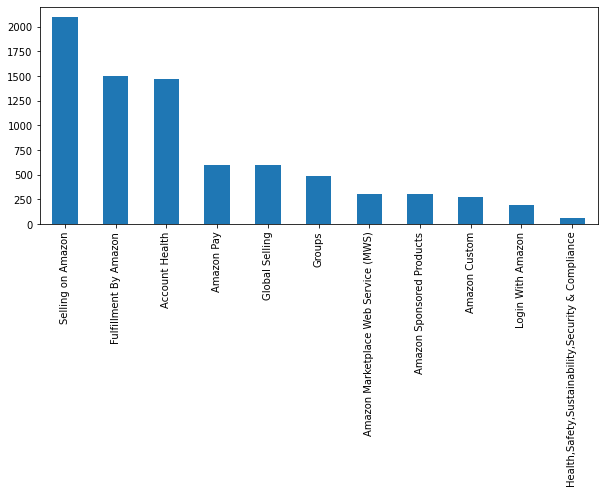

In [21]:
my_categories = ['Fulfillment By Amazon', 'Selling on Amazon',
       'Amazon Marketplace Web Service (MWS)',
       'Amazon Sponsored Products', 'Account Health', 'Global Selling',
       'Amazon Pay', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Login With Amazon', 'Amazon Custom']
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar');

In [22]:
df[df['Category'] == 'Health,Safety,Sustainability,Security & Compliance'].shape

(59, 6)

In [23]:
df[df['Category'] == 'Health,Safety,Sustainability,Security & Compliance'].head()

,Title,Category,Post Author,Leading Comment,Reply Comments,post
5495,Selling Pesticide Products NOT,"Health,Safety,Sustainability,Security & Compli...",PondExpo,HI…amazon classified about 17 of my listings a...,['\nHI…amazon classified about 17 of my listin...,Selling Pesticide Products NOT HI…amazon class...
5496,Account suspended because of restricted brand,"Health,Safety,Sustainability,Security & Compli...",EMSHOP,Hello there Amazon suspended my account becaus...,['\nHello there Amazon suspended my account be...,Account suspended because of restricted brand ...
5497,Product loading,"Health,Safety,Sustainability,Security & Compli...",Ekrem_Arslanalp_Stor,Hello you asked me why I installed suspected f...,['\nHello you asked me why I installed suspect...,Product loading Hello you asked me why I insta...
5498,Automotive Approval,"Health,Safety,Sustainability,Security & Compli...",Solution_Concepts1,Hello everyone Could somebody tell me about ow...,['\nHello everyone Could somebody tell me abou...,Automotive Approval Hello everyone Could someb...
5499,Intellectual property complaints associated wi...,"Health,Safety,Sustainability,Security & Compli...",grandmatabby1,The Book I listed is Called The below is a rec...,['\nThe Book I listed is Called The below is a...,Intellectual property complaints associated wi...


In [24]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text
    
df['post'] = df['post'].apply(clean_text)

In [25]:
class_list = ['Fulfillment By Amazon', 'Selling on Amazon',
       'Amazon Marketplace Web Service (MWS)',
       'Amazon Sponsored Products', 'Account Health', 'Global Selling',
       'Amazon Pay', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Login With Amazon', 'Amazon Custom']
new_df = pd.DataFrame()
new_df['post'] = df['post']
new_df['category'] = df['Category']
new_df['post'] = new_df['post'].apply(lambda x: str(x))
new_df['category'] = new_df['category'].apply(lambda x: str(x))

In [26]:
len(class_list)

11

In [27]:
new_df.head()

,post,category
0,2 boxes of books i need to know how to start ...,Fulfillment By Amazon
1,fba shipment delivered delayed check in hi are...,Fulfillment By Amazon
2,fba removal disposal fees hi all\nso back when...,Fulfillment By Amazon
3,am i able to send in fba inventory now? im usi...,Fulfillment By Amazon
4,stranded inventory i recently listed 100 books...,Fulfillment By Amazon


In [28]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_df['category'] = new_df.apply(lambda x:  class_list.index(x['category']),axis=1)

In [29]:
new_df.head()

,post,category
0,2 boxes of books i need to know how to start ...,0
1,fba shipment delivered delayed check in hi are...,0
2,fba removal disposal fees hi all\nso back when...,0
3,am i able to send in fba inventory now? im usi...,0
4,stranded inventory i recently listed 100 books...,0


In [30]:
new_df['category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_df, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (7093, 2)
test shape:  (789, 2)


# Load pre-trained model

🚨 **If it doesn't work restart runtime**

In [33]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-uncased",
    num_labels=11,
    args=train_args
)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

# Train model

In [34]:
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:395: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/7093 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/887 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 4:   0%|          | 0/887 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/887 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/887 [00:00<?, ?it/s]

(3548, 0.7146341757604217)

In [35]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:975: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/789 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/99 [00:00<?, ?it/s]

In [36]:
result

{'acc': 0.7414448669201521,
 'eval_loss': 1.1554073952514716,
 'f1': 0.7414448669201521,
 'mcc': 0.6904852881187264}

# save and load the model

save files without outputs/ 


In [37]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [38]:
save_model('outputs','amazonforum-bert-categclass')

In [39]:
!tar -zxvf ./amazonforum-bert-categclass.tar.gz

outputs/pytorch_model.bin
outputs/special_tokens_map.json
outputs/config.json
outputs/model_args.json
outputs/training_args.bin
outputs/tokenizer_config.json
outputs/vocab.txt
outputs/eval_results.txt


In [40]:
!rm -rf outputs

# Test the loaded model on a real example

In [41]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('amazonforum-bert-categclass')

In [42]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "outputs/",
    num_labels=11,
    args=train_args
)

In [43]:
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [44]:
class_list = ['Fulfillment By Amazon', 'Selling on Amazon',
       'Amazon Marketplace Web Service (MWS)',
       'Amazon Sponsored Products', 'Account Health', 'Global Selling',
       'Amazon Pay', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Login With Amazon', 'Amazon Custom']

post = "As far as overall strategy, think of the Master Import Spreadsheet as your directory for imports. You will only have one copy of this. You will have many copies of the Product Extraction Sheet. One for each extraction you do and each one will be recorded in the Master Import Spreadsheet."

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])
# Label : Flowster-specific

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Selling on Amazon


In [45]:
post2 = input('Your forum post: ')

Your forum post: I had mis-entered a price of less than $2.00, on a book that was selling for $80.00 (approx). Someone purchased the book, but I contacted them about the error, offering a discount off of what ‘should’ have been the actual price. I don’t intend to sell this for the erroneous price.  I have not heard back from the buyer; what’s the best approach here?  Hoping to hear from an Amazon rep.  Thanks Dave S


In [46]:
post2

'I had mis-entered a price of less than $2.00, on a book that was selling for $80.00 (approx). Someone purchased the book, but I contacted them about the error, offering a discount off of what ‘should’ have been the actual price. I don’t intend to sell this for the erroneous price.  I have not heard back from the buyer; what’s the best approach here?  Hoping to hear from an Amazon rep.  Thanks Dave S'

In [47]:
print(clean_text(post2))

predictions, raw_outputs = model.predict([clean_text(post2)])

print(class_list[predictions[0]])
# Label : Account Health

i had mis-entered a price of less than $2.00  on a book that was selling for $80.00  approx . someone purchased the book  but i contacted them about the error  offering a discount off of what ‘should  have been the actual price. i don t intend to sell this for the erroneous price.  i have not heard back from the buyer  what s the best approach here?  hoping to hear from an amazon rep.  thanks dave s


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Selling on Amazon


For post 2 our model could have misclassified the post because I only provided it as input the forum post without a title while I trained the model on a concatenation of both the `title` and `post body`. While for post 1 it's actually a post from a different e-commerce forum called Flowster 😅.

In [48]:
post3_title = input('Your forum post title: ')

Your forum post: Do I dare send a LARGE amount of inventory to any FC?


In [49]:
post3_body = input('Your forum post body: ')

Your forum post body: I have a particular ASIN that has been performing well and growing at a very good velocity rate. It’s my only ASIN without a tight sending limit, however, I am out of FBA inventory and have a back-up FBM buy box for now. Manufacture (U.S.) notified me that my late order is about to be ready to be shipped. I can create a shipping plan which will allow up to 85% of the units I have available to send from the manufacture. What I currently have and the other 15% will cover the gap under normal circumstances. My concern is this: Can I trust sending 85% of that inventory to Amazon? I currently have a straggler container that arrived back on November 7th, that didn’t get checked in until January 3rd and won’t be available STILL until January 25th. I hate seeing the slow increase in my BSR by just having FBM the last few days but what would be worst would be to become completely out of inventory due to 3 month delays that I’ve already experienced with my last FBA send.  A

In [50]:
post3 = post3_title + ' ' + post3_body
predictions, raw_outputs = model.predict([post3])

print(class_list[predictions[0]])
# Label : Fulfillment By Amazon

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Fulfillment By Amazon


In [51]:
post4_title = input('Your forum post title: ')
post4_body = input('Your forum post body: ')

Your forum post title: Reactivate Account
Your forum post body: Dear Amazon Seller Performance Team,  As requested I provide below the plan of action - which shows the root causes and corrective & preventive measures to avoid the same in the future. Upon a long phone conversation with the Amazon support specialist who gave me several useful advice now everything is compliant with the standards of Amazon. Problem Identified: Seller Identity Verification Issues The root cause(s) of the issue: I was negligent while gathering all the documents needed and while previously submitting them I missed a couple of documents that were important. There was a discrepancy between data in my utility bill information and the information given in the Account Info of my Seller Account. It happened due to the abbreviation that I used in the translation. As matter of fact in one place, there was the word “street”, while in another place its abbreviation “st.” It occurred due to my inexperience and lack of 

In [52]:
post4 = post4_title + ' ' + post4_body

predictions, raw_outputs = model.predict([post4])

print(class_list[predictions[0]])
# Label : Account Health

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Account Health


The model still needs some fine tuning to be able to perform better.  
- **Library resources:** 
https://simpletransformers.ai/docs/multi-class-classification/  
- Check out the other [colab notebook](https://colab.research.google.com/drive/1TT6jWJRv5eynmCGEt8yvdmY5GZP75Eb6?usp=sharing) as well.
- This notebook is taken and adjusted from this blog post : https://www.philschmid.de/bert-text-classification-in-a-different-language 